In [1]:
from igraph import Graph
import numpy as np

In [2]:
def get_average_shortest_path_length(shortest_paths):
    m = np.array(shortest_paths)
    return np.average(m)

In [3]:
p_list = [10 ** -i for i in np.linspace(start=4, stop=0, num=14)]
results_sp = np.zeros(len(p_list), dtype=float)
results_cc = np.zeros(len(p_list), dtype=float)

for i, p in enumerate(p_list):
    watts = Graph.Watts_Strogatz(dim=1, size=2000, nei=4, p=p)
    results_sp[i] = watts.average_path_length()
    results_cc[i] = watts.transitivity_undirected()

# Scale values in [0, 1]
results_sp = (results_sp / results_sp[0]).tolist()
results_cc = (results_cc / results_cc[0]).tolist()

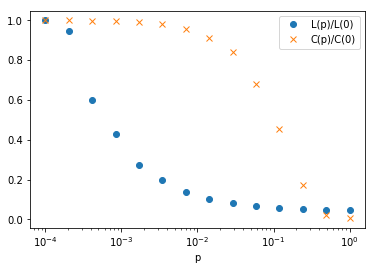

In [6]:
from IPython import display
from igraph import plot

import matplotlib.pyplot as plt

%matplotlib inline
plt.xlabel('p')
plt.semilogx(p_list, results_sp, 'o', label='L(p)/L(0)')
plt.semilogx(p_list, results_cc, 'x', label='C(p)/C(0)')
plt.legend()

plt.savefig('images/task1.png')

In [ ]:
r = plot(watts, layout=watts.layout_lgl(), target='./images/watts.png')

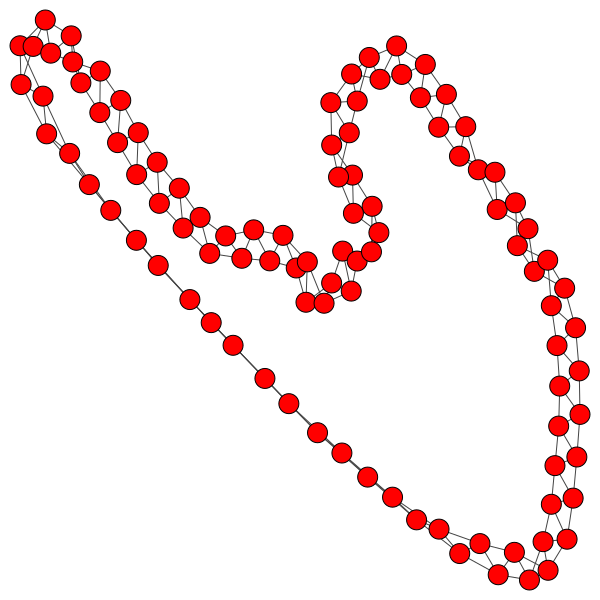

In [5]:
watts = Graph.Watts_Strogatz(dim=1, size=100, nei=2, p=0)
r = plot(watts, layout=watts.layout_lgl(), target='./images/watts.png')
display.Image(filename='./images/watts.png')